In [16]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import json
import http
conec = http.client.HTTPSConnection('www.alphavantage.co', timeout = 10)
conec.request("GET", '/query?function=TIME_SERIES_MONTHLY&symbol=MSFT&interval=5min&apikey=07THEOFGYUDV073A')
resp=conec.getresponse()
jro = json.loads(resp.read().decode('utf8'))
#for k, v in jro['Monthly Time Series'].items():
    #print('Event at time ' + k)
    #print(v)
#print(jro['Time Series (5min)']['2019-10-16 20:00:00']['3. low'])


#for trainning
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import datetime as dt
import urllib.request, json
import os
import numpy as np
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# variables: '1. open', '2. high', '3. low', '4. close'
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

"""HIGH DATA and LOW DATA"""
k=0
mid=[]
test=[]
for timestamp, data in jro['Monthly Time Series'].items():
    high = float(data['2. high'])
    low = float(data['3. low'])
    midpoint = (high+low)/2.0
    if k < 200:
        mid.append(midpoint)
    else:
        
        test.append(midpoint)
    k = k + 1
    #print(timestamp) -> from 2019 to begining
    #]\\print(test)
"""............................................."""
"""OPEN STOCK """
#for timestamp, data in jro['Monthly Time Series'].items():
#    openn=float(data['1. open'])
#    #print(openn)
"""CLOSE STOCK"""
#for timestamp, data in jro['Monthly Time Series'].items():
#    close=float(data['4. close'])
#    #print(close)



scaler = MinMaxScaler()

training_data = np.array(mid).reshape(-1,1)
testing_data = np.array(test).reshape(-1,1)
print(train_reshape[di:di+smoothing_window_size,:])
smoothing_window_size = 50
for di in range(0,100,smoothing_window_size):
    scaler.fit(training_data[di:di+smoothing_window_size,:])
    training_data[di:di+smoothing_window_size,:] = scaler.transform(training_data[di:di+smoothing_window_size,:])


scaler.fit(training_data[di+smoothing_window_size:,:])
training_data[di+smoothing_window_size:,:] = scaler.transform(training_data[di+smoothing_window_size:,:])

training_data = training_data.reshape(-1)
testing_data = scaler.transform(testing_data).reshape(-1)

y_train=[]

EMA = 0.0
gamma = 0.1
for ti in range(200):
  EMA = gamma*training_data[ti] + (1-gamma)*EMA
  training_data[ti] = EMA
all_mid_data = np.concatenate([training_data, testing_data], axis=0)
classifier=Sequential()
classifier.add(Conv1D(32, (3), input_shape=(4,1), activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(64, kernel_initializer='softmax'))
classifier.add(Dense(training_data, activation='softmax'))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy")#metrics = ["accuracy"])
x=classifier.fit(training_data, y_train, epochs=200, verbose=1)
print(type(training_data))


IndexError: list index out of range

<class 'pandas.core.frame.DataFrame'>


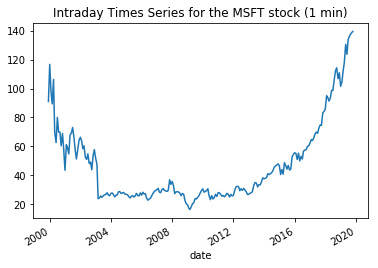

In [5]:
#ts = TimeSeries(key='07THEOFGYUDV073A', output_format='pandas')

window_size=100
N=training_data.size
avg_predictions=[]
avg_x=[]
for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = jro.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = jro.loc[pred_idx,'']

    avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((avg_predictions[-1]-training_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE predic %.5f'%(0.5*np.mean(mse_errors)))






In [4]:
#EMA = 0.0
#gamma = 0.1
#for ti in range(11000):
 # EMA = gamma*train_reshape[ti] + (1-gamma)*EMA
  #train_reshape[ti] = EMA